# Import the data, dependencies, conver saledate into saleyear, and view data #

In [2]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
str_path_file = "Data/clean_car_prices.csv"
df_clean_car_prices = pd.read_csv(str_path_file)
print(datetime.datetime.now())

2024-03-21 06:15:09.919599


In [11]:
df_clean_car_prices['saledate'] = pd.to_datetime(df_clean_car_prices['saledate'], errors='coerce')
df_clean_car_prices = df_clean_car_prices.dropna(subset=['saledate'])
df_clean_car_prices['saleyear'] = df_clean_car_prices['saledate'].dt.year
print(datetime.datetime.now())

2024-03-21 06:33:03.410758


In [16]:
print(datetime.datetime.now())
print(f"The df_clean_car_prices dataframe has {len(df_clean_car_prices)} records.")
df_clean_car_prices.head()

The df_clean_car_prices dataframe has 395489 records.


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00+08:00,2014
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00+08:00,2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00+08:00,2015
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00+08:00,2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 12:30:00+08:00,2014


# Make Analysis #

### Group by 'make'and 'saleyear' and calculate 'meansellingprice' and describe data ###

In [42]:
saleyear_grouped_df = df_clean_car_prices.groupby(['make', 'saleyear'])['sellingprice'].mean().reset_index()
saleyear_grouped_df.rename(columns={'sellingprice': 'meansellingprice'}, inplace=True)
print(datetime.datetime.now())
print(f"The saleyear_grouped_df dataframe has {len(saleyear_grouped_df)} records.")
saleyear_grouped_df.head()

2024-03-21 07:32:32.301125
The saleyear_grouped_df dataframe has 179 records.


,make,saleyear,meansellingprice
0,Acura,2014,13162.957746
1,Acura,2015,14094.864865
2,Aston Martin,2015,55653.333333
3,Audi,2014,16518.173913
4,Audi,2015,18968.172454


In [43]:
saleyear_grouped_df.describe()

,saleyear,meansellingprice
count,179.000000,179.000000
mean,2014.486034,15938.555682
std,0.501207,24986.605028
min,2014.000000,300.000000
25%,2014.000000,4074.009982
50%,2014.000000,9515.372508
75%,2015.000000,15175.194268
max,2015.000000,153333.333333


### Calculate the age when the car was sold ###

In [25]:
df_clean_car_prices['age_when_sold'] = df_clean_car_prices['saleyear'] - df_clean_car_prices['year']
df_clean_car_prices.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,age_when_sold
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00+08:00,2014,-1
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00+08:00,2014,-1
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00+08:00,2015,1
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00+08:00,2015,0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 12:30:00+08:00,2014,0


### Group by 'make'and 'age_when_sold' and calculate 'meansellingprice'; and describe data ###

In [93]:
age_when_sold_grouped_df = df_clean_car_prices.groupby(['make', 'age_when_sold'])['sellingprice'].mean().reset_index()
age_when_sold_grouped_df.rename(columns={'sellingprice': 'meansellingprice'}, inplace=True)
print(datetime.datetime.now())
print(f"The age_when_sold_grouped_df dataframe has {len(age_when_sold_grouped_df)} records.")
age_when_sold_grouped_df.head()

2024-03-21 08:42:08.715152
The age_when_sold_grouped_df dataframe has 1193 records.


,make,age_when_sold,meansellingprice
0,Acura,0,32808.108108
1,Acura,1,30418.478261
2,Acura,2,21571.745152
3,Acura,3,20432.899921
4,Acura,4,20098.809524


### age_when_sold_grouped_df ###

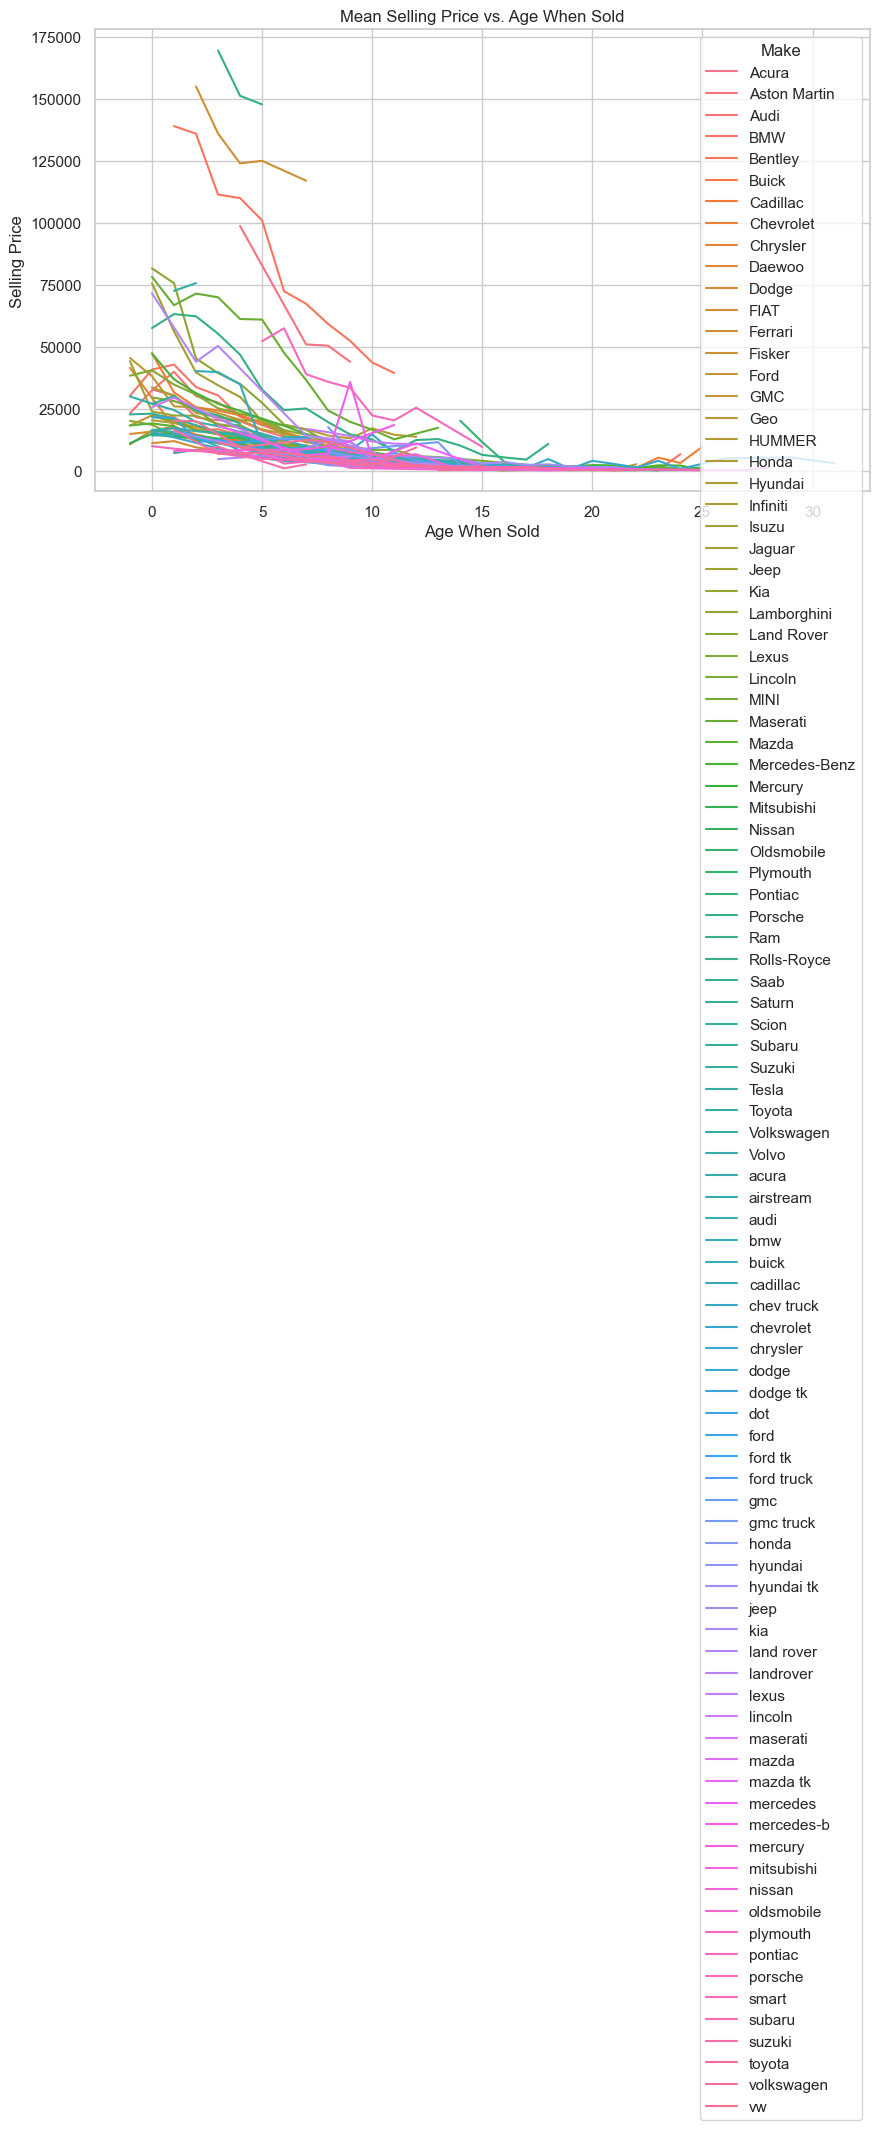

In [94]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_when_sold_grouped_df, x='age_when_sold', y='meansellingprice', hue='make', palette='husl')

# Set the title and labels
plt.title('Mean Selling Price vs. Age When Sold')
plt.xlabel('Age When Sold')
plt.ylabel('Selling Price')

# Display the plot
plt.legend(title='Make', loc='upper right')
plt.show()

In [95]:
# Assuming grouped_df is your DataFrame with columns 'make', 'age_when_sold', and 'sellingprice'

# Filter grouped_df for specific makes
selected_makes = ['Ford', 'Chevrolet', 'Nissan', 'Toyota']

df_age_when_sold_grouped_df_FCNT = age_when_sold_grouped_df[age_when_sold_grouped_df['make'].isin(selected_makes)]
df_age_when_sold_grouped_df_FCNT = df_age_when_sold_grouped_df_FCNT[df_age_when_sold_grouped_df_FCNT['age_when_sold'] > 1]

# Display the filtered DataFrame
print(datetime.datetime.now())
print(f"The df_age_when_sold_grouped_df_FCNT dataframe has {len(df_age_when_sold_grouped_df_FCNT)} records.")
df_age_when_sold_grouped_df_FCNT.head()

2024-03-21 08:43:12.165702
The df_age_when_sold_grouped_df_FCNT dataframe has 93 records.


,make,age_when_sold,meansellingprice
136,Chevrolet,2,14681.341733
137,Chevrolet,3,12751.082156
138,Chevrolet,4,12399.934301
139,Chevrolet,5,10710.913495
140,Chevrolet,6,9346.596015


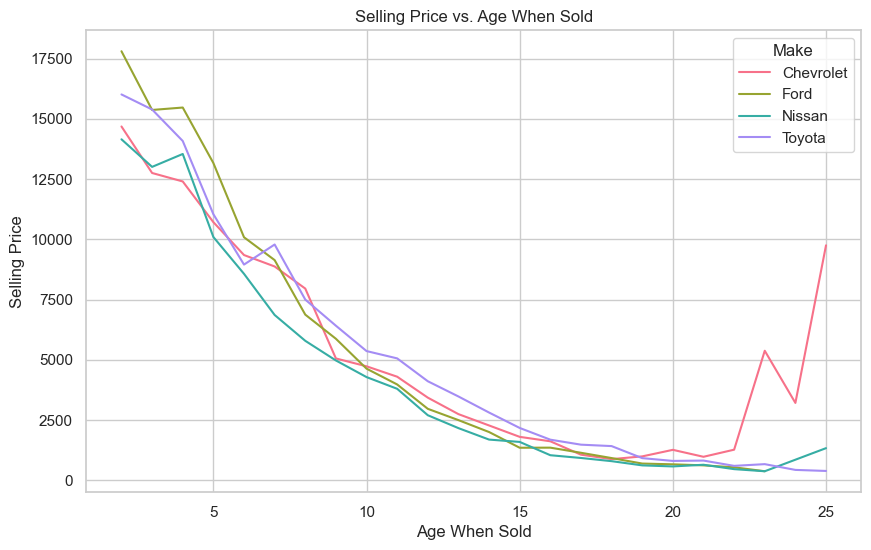

In [96]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped_df_FCNT, x='age_when_sold', y='meansellingprice', hue='make', palette='husl')

# Set the title and labels
plt.title('Selling Price vs. Age When Sold')
plt.xlabel('Age When Sold')
plt.ylabel('Selling Price')

# Display the plot
plt.legend(title='Make', loc='upper right')
plt.show()

# Model analysis #

In [58]:
df_clean_car_prices.describe()

,year,condition,odometer,mmr,sellingprice,saleyear,age_when_sold
count,395489.000000,383696.000000,395406.000000,395489.000000,395489.000000,395489.000000,395489.000000
mean,2009.784151,30.418360,70655.121913,13308.555927,13176.609653,2014.864150,5.080000
std,4.044503,13.584856,54551.486726,9377.888727,9466.493723,0.342629,4.020802
min,1982.000000,1.000000,1.000000,25.000000,1.000000,2014.000000,-1.000000
25%,2007.000000,23.000000,29014.000000,6525.000000,6300.000000,2015.000000,2.000000
50%,2011.000000,34.000000,55083.000000,12000.000000,11900.000000,2015.000000,4.000000
75%,2013.000000,41.000000,103051.000000,17800.000000,17800.000000,2015.000000,8.000000
max,2015.000000,49.000000,999999.000000,176000.000000,230000.000000,2015.000000,33.000000


### Chevrolet ###

In [56]:
# Filter by Chevrolet, condition, and color
chevrolet_cars = df_clean_car_prices[(df_clean_car_prices['make'] == 'Chevrolet') &
                                     (df_clean_car_prices['sellingprice'] > 7500) &
                                     (df_clean_car_prices['age_when_sold'] >20)]

# Display the filtered DataFrame
display(chevrolet_cars)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,age_when_sold
171783,1992,Chevrolet,Corvette,Base,Convertible,automatic,1g1yy33p7n5112321,nc,3.0,14372.0,red,black,flow gm auto center,9025.0,13700.0,2015-01-20 01:15:00+08:00,2015,23
293302,1990,Chevrolet,C/K 1500 Series,454SS,Regular Cab,automatic,1gcdc14n4lz157583,fl,3.0,101927.0,black,red,american bank auto liquidators,7225.0,8000.0,2015-02-10 01:30:00+08:00,2015,25
363610,1990,Chevrolet,C/K 1500 Series,454SS,Regular Cab,automatic,1gcdc14n5lz242061,tn,4.0,34266.0,black,red,t & s motors,9550.0,11500.0,2015-03-04 02:30:00+08:00,2015,25


In [61]:
# Filter by Chevrolet, condition, and color
chevrolet_cars_condition = df_clean_car_prices[(df_clean_car_prices['make'] == 'Chevrolet') &
                                     (df_clean_car_prices['condition'] > 48)]

# Display the filtered DataFrame
display(chevrolet_cars_condition)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,age_when_sold
2214,2014,Chevrolet,Malibu,LT,Sedan,automatic,1g11c5sl9ef255078,ca,49.0,6874.0,black,black,gm financial,16200.0,16200.0,2014-12-17 12:30:00+08:00,2014,0
3767,2006,Chevrolet,Silverado 1500,LS2,Crew Cab,automatic,2gcec13v561250941,ca,49.0,97742.0,white,gray,coast sports cars inc,8800.0,13250.0,2014-12-17 12:15:00+08:00,2014,8
7877,2015,Chevrolet,Silverado 2500HD,Work Truck,Crew Cab,automatic,1gc1kue89ff108823,az,49.0,10256.0,white,gray,capps rent a car,38500.0,39000.0,2014-12-18 11:00:00+08:00,2014,-1
7880,2015,Chevrolet,Suburban,LTZ,SUV,NaN,1gnskkkc2fr201125,pa,49.0,14031.0,black,black,enterprise veh exchange/rental,57100.0,56200.0,2014-12-19 09:00:00+08:00,2014,-1
8785,2011,Chevrolet,Silverado 1500,LT,Crew Cab,NaN,3gcpkse36bg305380,pa,49.0,30162.0,red,black,maritime motors of fairfield inc,26300.0,24000.0,2014-12-19 09:30:00+08:00,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400003,2014,Chevrolet,Silverado 1500,High Country,Crew Cab,NaN,3gcuktec7eg443152,pa,49.0,1835.0,black,brown,big tree auto brokers,41900.0,41600.0,2015-03-06 01:15:00+08:00,2015,1
400412,2009,Chevrolet,Silverado 2500HD,LTZ,Crew Cab,automatic,1gchk63699f101662,pa,49.0,94984.0,burgundy,black,daniel thomas sales,29700.0,31800.0,2015-03-06 01:30:00+08:00,2015,6
400686,2006,Chevrolet,Silverado 3500,Work Truck,Crew Cab,automatic,1gcjk33d46f167823,ca,49.0,117154.0,white,black,california fleet inc,22300.0,25000.0,2015-03-05 04:00:00+08:00,2015,9
401205,2013,Chevrolet,Silverado 1500,LT,Extended Cab,NaN,1gcrkse73dz279593,pa,49.0,6475.0,red,black,nil les auto sales inc,28400.0,26300.0,2015-03-06 01:15:00+08:00,2015,2


In [62]:
# Filter by Chevrolet, condition, and color
Silverado_3500 = df_clean_car_prices[(df_clean_car_prices['model'] == 'Silverado 3500')]
Silverado_3500.describe()

,year,condition,odometer,mmr,sellingprice,saleyear,age_when_sold
count,31.000000,30.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2005.290323,26.133333,162596.161290,15054.838710,15108.064516,2014.774194,9.483871
std,0.972747,14.383260,76633.948617,6748.105967,8527.241609,0.425024,0.995690
min,2003.000000,1.000000,18155.000000,75.000000,2000.000000,2014.000000,8.000000
25%,2005.000000,21.000000,93855.500000,9900.000000,7950.000000,2015.000000,9.000000
50%,2006.000000,28.500000,167347.000000,15300.000000,12400.000000,2015.000000,9.000000
75%,2006.000000,37.000000,213684.000000,21550.000000,23250.000000,2015.000000,10.000000
max,2006.000000,49.000000,378315.000000,27400.000000,30200.000000,2015.000000,12.000000


### Ferarri ###

In [64]:
# Filter by Chevrolet, condition, and color
Ferarri = df_clean_car_prices[(df_clean_car_prices['make'] == 'Ferrari')]
Ferarri.describe()

,year,condition,odometer,mmr,sellingprice,saleyear,age_when_sold
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2010.857143,42.428571,12508.571429,139714.285714,135428.571429,2014.571429,3.714286
std,1.573592,7.590721,7667.918163,12671.678207,15262.777629,0.534522,1.799471
min,2008.000000,26.000000,7529.000000,121000.000000,117000.000000,2014.000000,2.000000
25%,2010.000000,42.500000,9016.500000,130500.000000,124500.000000,2014.000000,2.500000
50%,2012.000000,45.000000,10180.000000,143000.000000,131000.000000,2015.000000,3.000000
75%,2012.000000,46.500000,11101.500000,148500.000000,147500.000000,2015.000000,4.500000
max,2012.000000,48.000000,29615.000000,156000.000000,156000.000000,2015.000000,7.000000


### Model and Age: mean selling price ###

In [69]:
df_age_when_sold_grouped_model_make = df_clean_car_prices.groupby(['make', 'model', 'age_when_sold'])['sellingprice'].mean().reset_index()
df_age_when_sold_grouped_model_make.rename(columns={'sellingprice': 'meansellingprice'}, inplace=True)
print(datetime.datetime.now())
print(f"The df_age_when_sold_grouped_model_make dataframe has {len(df_age_when_sold_grouped_model_make)} records.")
age_when_sold_grouped_df.head()

2024-03-21 08:18:34.196575
The df_age_when_sold_grouped_model_make dataframe has 6037 records.


,make,model,age_when_sold,meansellingprice
0,Acura,CL,11,4800.000000
1,Acura,CL,12,3076.666667
2,Acura,CL,13,1744.444444
3,Acura,CL,14,2197.619048
4,Acura,CL,15,1462.500000


In [73]:
df_chevy_ferarri = df_age_when_sold_grouped_model_make[df_age_when_sold_grouped_model_make['make'].isin(['Ferrari', 'Chevrolet'])]

print(datetime.datetime.now())
print(f"The df_chevy_ferarri dataframe has {len(df_chevy_ferarri)} records.")
df_chevy_ferarri.head()

2024-03-21 08:22:01.518047
The df_chevy_ferarri dataframe has 449 records.


,make,model,age_when_sold,meansellingprice
785,Chevrolet,Astro,10,2520.000000
786,Chevrolet,Astro,11,2334.375000
787,Chevrolet,Astro,12,2443.333333
788,Chevrolet,Astro,13,1075.000000
789,Chevrolet,Astro,14,883.333333


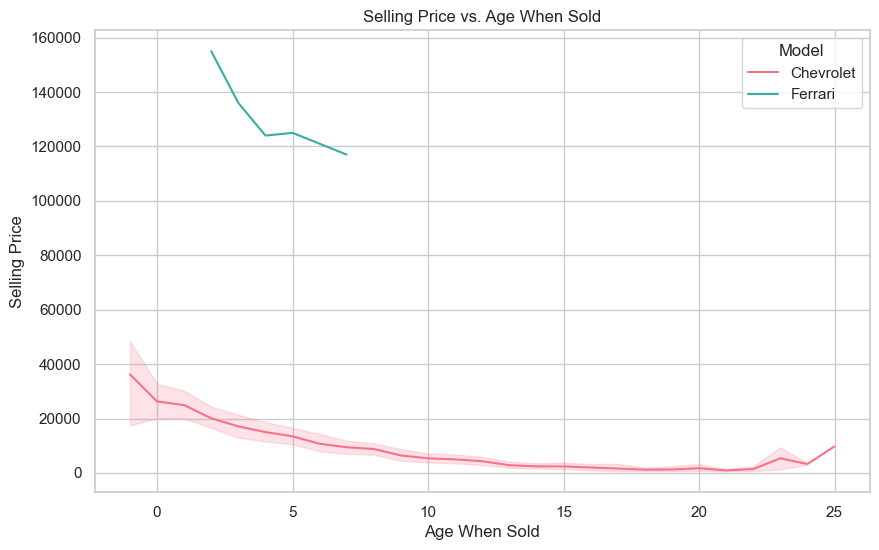

In [74]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_chevy_ferarri, x='age_when_sold', y='meansellingprice', hue='make', palette='husl')

# Set the title and labels
plt.title('Selling Price vs. Age When Sold')
plt.xlabel('Age When Sold')
plt.ylabel('Selling Price')

# Display the plot
plt.legend(title='Model', loc='upper right')
plt.show()

In [97]:
len(age_when_sold_grouped_df)

1193

In [98]:
age_when_sold_grouped_df.describe()

,age_when_sold,meansellingprice
count,1193.000000,1193.000000
mean,10.731769,10350.028672
std,6.598007,18379.616410
min,-1.000000,200.000000
25%,5.000000,1269.230769
50%,10.000000,4278.802721
75%,16.000000,11908.000000
max,31.000000,169500.000000


In [99]:
# Create age ranges like '1_2'
age_when_sold_grouped_df['age_range'] = age_when_sold_grouped_df['age_when_sold'].astype(str) + '_' + (age_when_sold_grouped_df['age_when_sold'] + 1).astype(str)

# Calculate mean selling price for each make and age_range group
df_make_agerange_grouped = age_when_sold_grouped_df.groupby(['make', 'age_range']).mean().reset_index()

# Calculate percentage change in mean selling price for each make
df_make_agerange_grouped['Percent_change_meansellingprice'] = df_make_agerange_grouped.groupby('make')['meansellingprice'].pct_change() * 100

# Remove NaN values resulting from the first row of each group
df_make_agerange_grouped.dropna(subset=['Percent_change_meansellingprice'], inplace=True)

# Format the percentage change column
df_make_agerange_grouped['Percent_change_meansellingprice'] = df_make_agerange_grouped['Percent_change_meansellingprice'].map(lambda x: f"{x:.2f}%")

df_make_agerange_grouped.head()

,make,age_range,age_when_sold,meansellingprice,Percent_change_meansellingprice
1,Acura,10_11,10.0,5823.767606,-82.25%
2,Acura,11_12,11.0,4629.964539,-20.50%
3,Acura,12_13,12.0,3354.411765,-27.55%
4,Acura,13_14,13.0,2753.800000,-17.91%
5,Acura,14_15,14.0,2347.422680,-14.76%


In [110]:
# Create age ranges like '1_2'
age_when_sold_grouped_df['age_range'] =  (age_when_sold_grouped_df['age_when_sold'] - 1).astype(str)    + '_' +  age_when_sold_grouped_df['age_when_sold'].astype(str) 

# Calculate mean selling price for each make and age_range group
df_change_price_age_when_sold_grouped = age_when_sold_grouped_df.groupby(['make', 'age_range']).mean().reset_index()

# Calculate percentage change in mean selling price for each make
df_change_price_age_when_sold_grouped['Percent_change_meansellingprice'] = df_change_price_age_when_sold_grouped.groupby('make')['meansellingprice'].pct_change() * 100

# Remove NaN values resulting from the first row of each group
df_change_price_age_when_sold_grouped.dropna(subset=['Percent_change_meansellingprice'], inplace=True)

# Convert percentage change to floating-point number after stripping '%'
df_change_price_age_when_sold_grouped['Percent_change_meansellingprice_float'] = df_change_price_age_when_sold_grouped['Percent_change_meansellingprice'].replace('%', '', regex=True).astype(float)

# Format the percentage change column
df_change_price_age_when_sold_grouped['Percent_change_meansellingprice'] = df_change_price_age_when_sold_grouped['Percent_change_meansellingprice'].map(lambda x: f"{x:.2f}%")

len(df_change_price_age_when_sold_grouped)

1098

In [111]:
df_change_price_age_when_sold_grouped.head()

,make,age_range,age_when_sold,meansellingprice,Percent_change_meansellingprice,Percent_change_meansellingprice_float
1,Acura,0_1,1.0,30418.478261,-7.28%,-7.283656
2,Acura,10_11,11.0,4629.964539,-84.78%,-84.779105
3,Acura,11_12,12.0,3354.411765,-27.55%,-27.549947
4,Acura,12_13,13.0,2753.800000,-17.91%,-17.905129
5,Acura,13_14,14.0,2347.422680,-14.76%,-14.756966


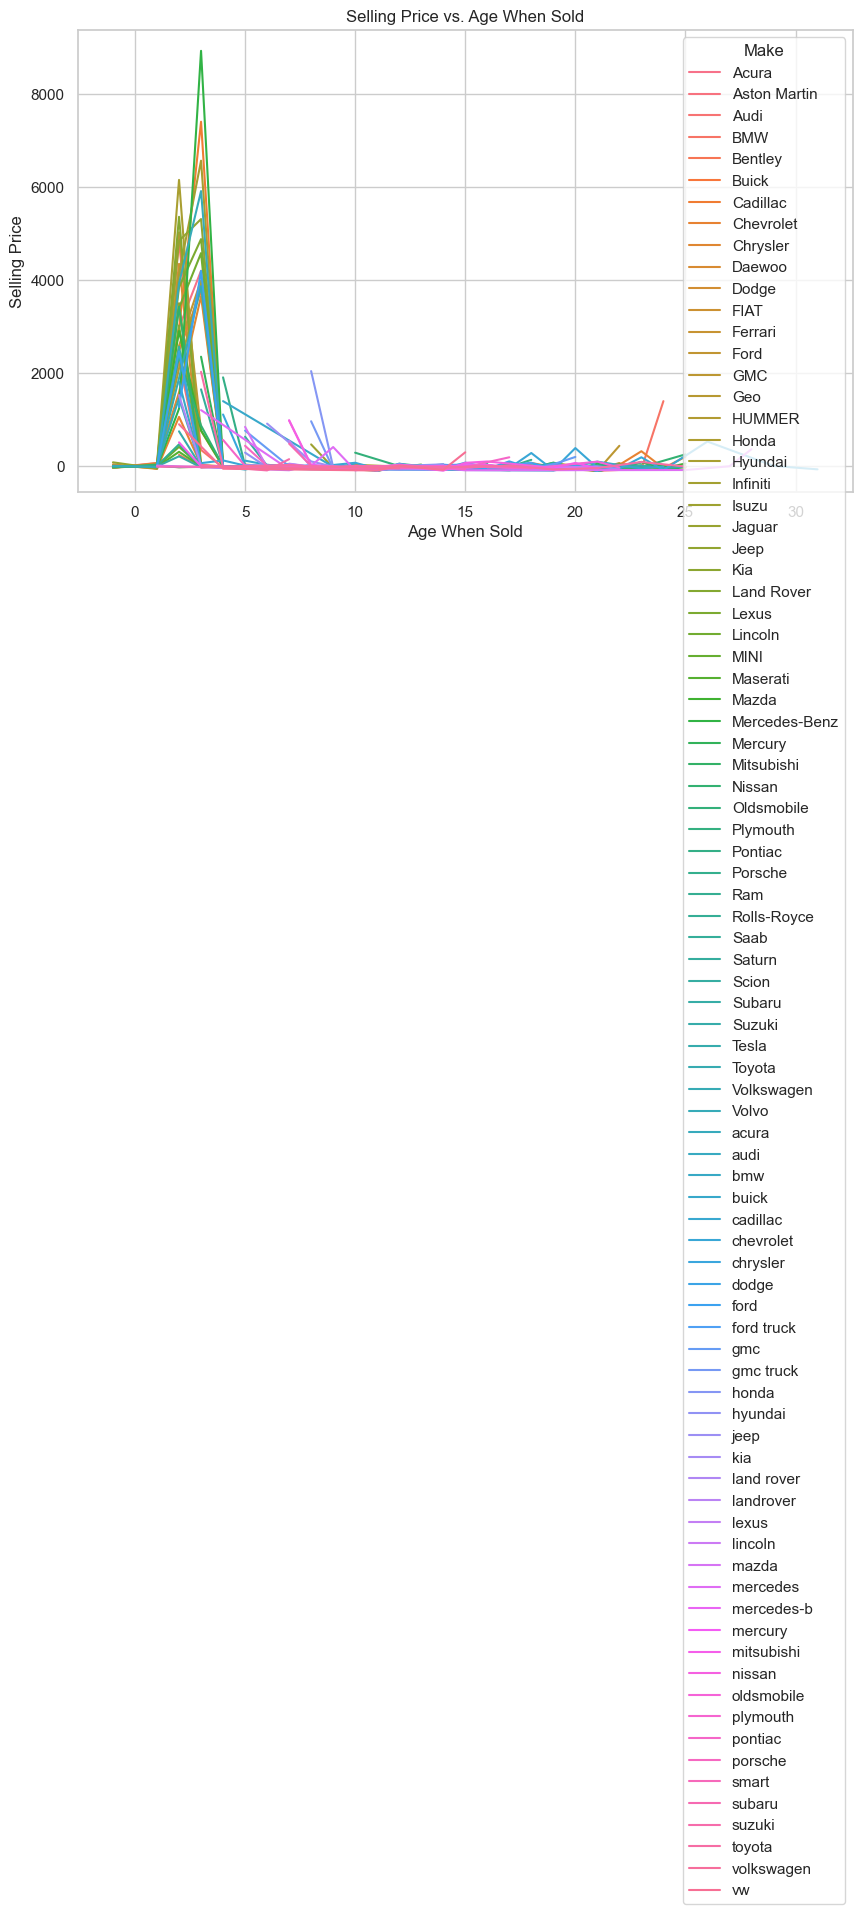

In [112]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_change_price_age_when_sold_grouped, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='make', palette='husl')

# Set the title and labels
plt.title('Selling Price vs. Age When Sold')
plt.xlabel('Age When Sold')
plt.ylabel('Selling Price')

# Display the plot
plt.legend(title='Make', loc='upper right')
plt.show()

In [115]:
selected_makes = ['Ford', 'Chevrolet', 'Nissan', 'Toyota']
df_change_price_age_when_sold_grouped_f_C_N_T = df_change_price_age_when_sold_grouped[df_change_price_age_when_sold_grouped['make'].isin(selected_makes)]

print(datetime.datetime.now())
print(f"The df_change_price_age_when_sold_grouped_f_C_N_T dataframe has {len(df_change_price_age_when_sold_grouped_f_C_N_T)} records.")
df_change_price_age_when_sold_grouped_f_C_N_T.head()

2024-03-21 08:54:49.476035
The df_change_price_age_when_sold_grouped_f_C_N_T dataframe has 100 records.


,make,age_range,age_when_sold,meansellingprice,Percent_change_meansellingprice,Percent_change_meansellingprice_float
134,Chevrolet,-2_-1,-1.0,41557.843137,41.43%,41.434985
135,Chevrolet,0_1,1.0,17887.518076,-56.96%,-56.957540
136,Chevrolet,10_11,11.0,4298.048686,-75.97%,-75.971800
137,Chevrolet,11_12,12.0,3429.467005,-20.21%,-20.208745
138,Chevrolet,12_13,13.0,2745.247934,-19.95%,-19.951178


In [123]:
df_change_price_age_when_sold_grouped_f_C_N_T = df_change_price_age_when_sold_grouped_f_C_N_T[(df_change_price_age_when_sold_grouped_f_C_N_T['age_when_sold'] > 3) ]

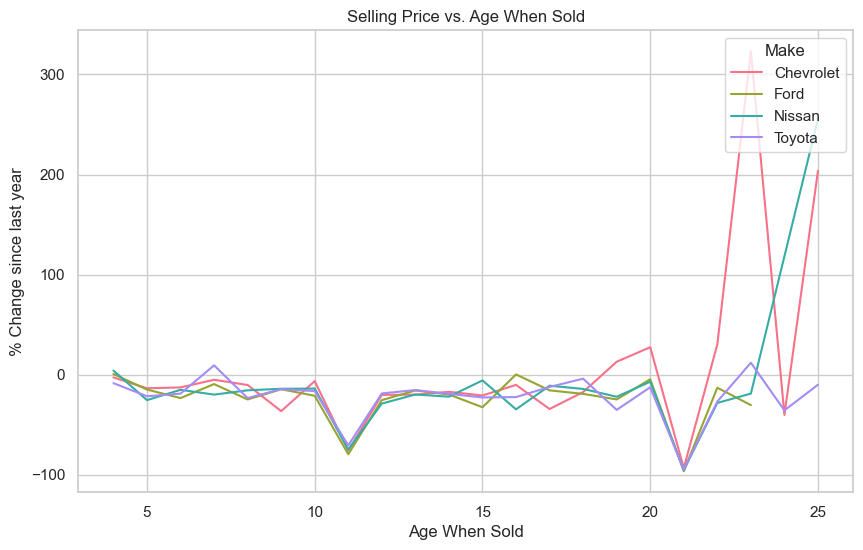

In [124]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_change_price_age_when_sold_grouped_f_C_N_T, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='make', palette='husl')

# Set the title and labels
plt.title('Selling Price vs. Age When Sold')
plt.xlabel('Age When Sold')
plt.ylabel('% Change since last year')

# Display the plot
plt.legend(title='Make', loc='upper right')
plt.show()